### Libraries required

In [50]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

---

### Loading the Dataset

In [51]:
telco_df = pd.read_csv("customer_churn.csv")

### Viewing the dataset 

In [52]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# Rows and Columns count
telco_df.shape

(7043, 21)

In [54]:
# Information on the values in the dataset
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
#Numerical summary of the dataset
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We can tell alot from this 
1. Most of our Customers are not Senior Citizens meaning age is below 60%
2. Since Max tenure is 72 we know that the customer has stayed with telco Organization for maximum of 6 years

### Checking for duplicates in the dataset

In [56]:
telco_df.duplicated().sum()

0

### Checking for missing values/ Null values

In [57]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dealing with the missing values.

In [58]:
# Viewing the rows with the missing values.
telco_df[telco_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [59]:
# confirming that only rows with tenure = 0 have a null value for Total charges
telco_df[telco_df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


This is because a new cutomer(tenure = 0) won't have any new charges hence the TotalCharges is 0. We can then impute the Null values from the Total Charges column with 0.

### Imputing the missing values with 0

In [60]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].fillna(0)

In [61]:
#confirming their no missing values left
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Understanding the Dataset

In [62]:
# viewing the columns we have.
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Viewing the values in each column

In [63]:
# Getting the unique values per column
for col in telco_df.columns:
    print(f"\n--- {col} ---")
    print(telco_df[col].unique())


--- customerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--- gender ---
['Female' 'Male']

--- SeniorCitizen ---
[0 1]

--- Partner ---
['Yes' 'No']

--- Dependents ---
['No' 'Yes']

--- tenure ---
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--- PhoneService ---
['No' 'Yes']

--- MultipleLines ---
['No phone service' 'No' 'Yes']

--- InternetService ---
['DSL' 'Fiber optic' 'No']

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- OnlineBackup ---
['Yes' 'No' 'No internet service']

--- DeviceProtection ---
['No' 'Yes' 'No internet service']

--- TechSupport ---
['No' 'Yes' 'No internet service']

--- StreamingTV ---
['No' 'Yes' 'No internet service']

--- StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Contract ---
['Month-to-month' 'O

## Variable Description is :
| Column             | Description                                                                 |
| ------------------ | --------------------------------------------------------------------------- |
| `customerID`       | Unique identifier for each customer.                                        |
| `gender`           | Customer’s gender (Male or Female).                                     |
| `SeniorCitizen`    | Indicates if the customer is a senior (1 = Yes, 0 = No).                    |
| `Partner`          | Whether the customer has a spouse or partner.                               |
| `Dependents`       | Whether the customer has dependents (like children or others they support). |
| `tenure`           | Number of months the customer has stayed with the company.                  |
| `PhoneService`     | Whether the customer has a telephone service.                               |
| `MultipleLines`    | Whether the customer has multiple phone lines.                              |
| `InternetService`  | Type of internet service (DSL, Fiber optic, or No).                   |
| `OnlineSecurity`   | Whether the customer has online security (or no internet).                  |
| `OnlineBackup`     | Whether the customer has online backup service.                             |
| `DeviceProtection` | Whether the customer has device protection service.                         |
| `TechSupport`      | Whether the customer has tech support access.                               |
| `StreamingTV`      | Whether the customer streams TV.                                            |
| `StreamingMovies`  | Whether the customer streams movies.                                        |
| `Contract`         | Type of contract (Month-to-month, One year, Two year).                |
| `PaperlessBilling` | Whether billing is paperless.                                               |
| `PaymentMethod`    | Method of payment                 |
| `MonthlyCharges`   | Amount charged to the customer per month.                                   |
| `TotalCharges`     | Total amount charged to the customer to date.                               |
| `Churn`            | Whether the customer has left the company (Yes or No).                  |


---

## Explanatory Data Analysis

### Churn Rate Visualization

Churn
No     5174
Yes    1869
Name: count, dtype: int64
 


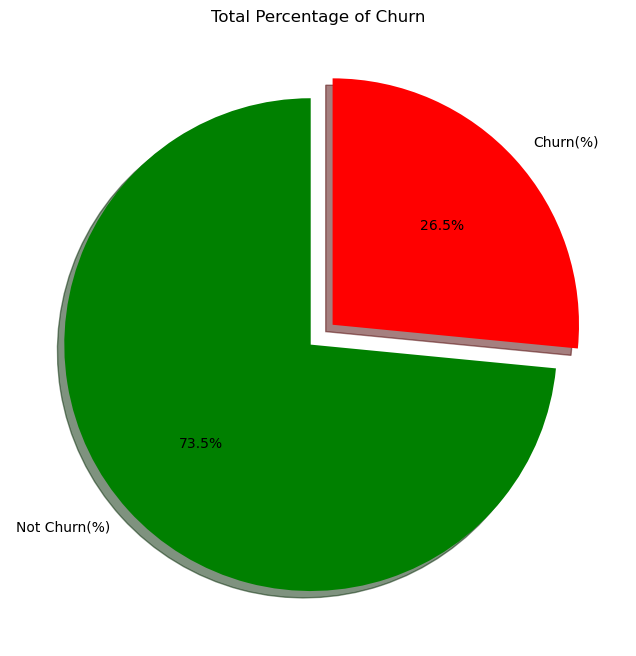

In [64]:
#Printing out the number of customers that have have churned and those that haven't
print(telco_df.Churn.value_counts())
print(" ")

# Drawing the Pie chart
telco_df['Churn'].value_counts().plot( kind='pie',figsize=(10,8),
autopct="%1.1f%%",
startangle=90,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.04,0.08])
plt.ylabel("")
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

From the chart above, we can see that 5,174 customers did not churn, which represents 73.5% of the total customer data in the dataset. On the other hand, 1,869 customers did churn, making up 26.5% of the total.

Ideally, the customer churn rate in the telecom industry ranges between 15% and 20%. In this case, we observe a churn rate of 26.5%, which is significantly higher than the industry average. This indicates that prompt action is needed to address the issue.

---

## How the numeric variables relate to churn.

In [65]:
# selecting the numeric columns
numeric_cols = telco_df.select_dtypes(include=['int64','float64']).columns # selecting only numeric columns

In [66]:
# printing the numeric columns out 
print(numeric_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


### Mean monthly charges against Churn visualization.

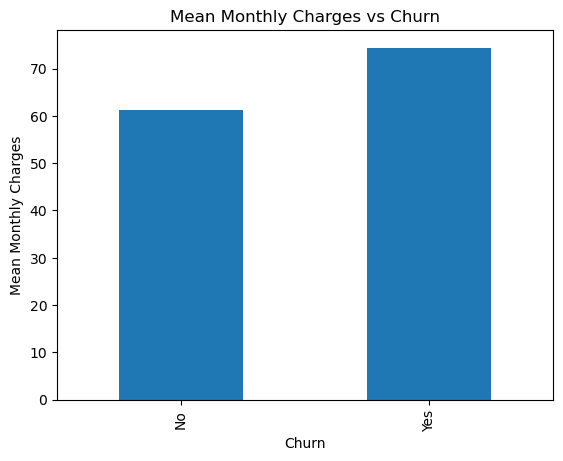

In [67]:
telco_df.groupby("Churn")["MonthlyCharges"].mean().plot(kind= 'bar')
plt.title("Mean Monthly Charges vs Churn")
plt.ylabel("Mean Monthly Charges")
plt.show()

Customers who churned generally had higher monthly charges compared to those who did not.

### Mean total charges against Churn visualization.

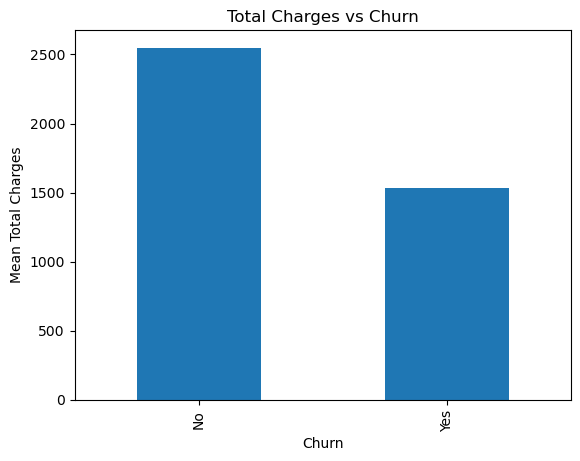

In [68]:
telco_df.groupby("Churn")["TotalCharges"].mean().plot(kind= 'bar')
plt.title("Total Charges vs Churn")
plt.ylabel("Mean Total Charges")
plt.show()

We can see that customers who churned had significantly less total charges.
This implies that most of them have not been a part for the company for a long time.

### Mean Tenure against Churn visualization.

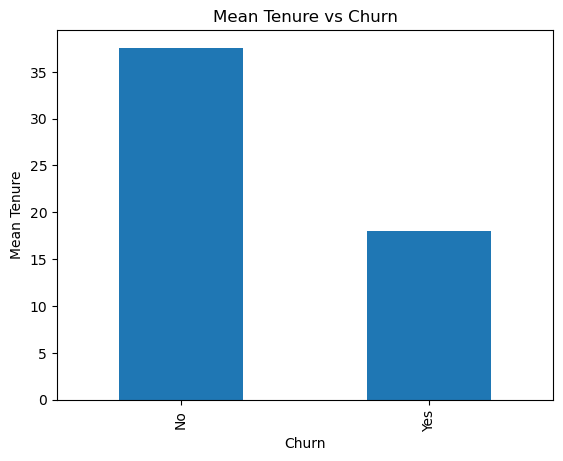

In [69]:
telco_df.groupby("Churn")["tenure"].mean().plot(kind= 'bar')
plt.title("Mean Tenure vs Churn")
plt.ylabel("Mean Tenure")
plt.show()

This graph supports our earlier observation that customers who churned had shorter tenures, meaning they hadn’t been with the company for very long.

We can see that the Total Charges, Tenure and Monthly Charges are highly correlated
This could be because the Total Charges is given by:
$$
\begin{align}
\text{Total Charges} &= \text{Tenure} \times \text{Monthly Charges}
\end{align}
$$

### Mean monthly charges against Contract type visualizaton

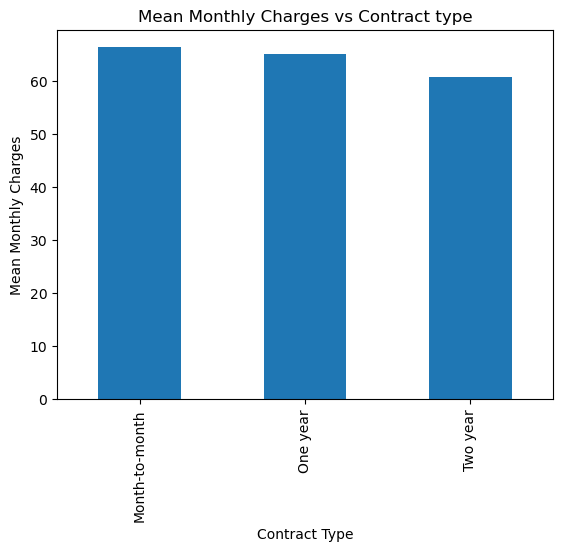

In [70]:
telco_df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Monthly Charges")
plt.xlabel("Contract Type")
plt.title("Mean Monthly Charges vs Contract type")
plt.show()

This graph shows that customers with longer contracts tend to have slightly lower average monthly charges, suggesting they may be rewarded with discounted rates.

### Mean monthly charges against Senior Citizens

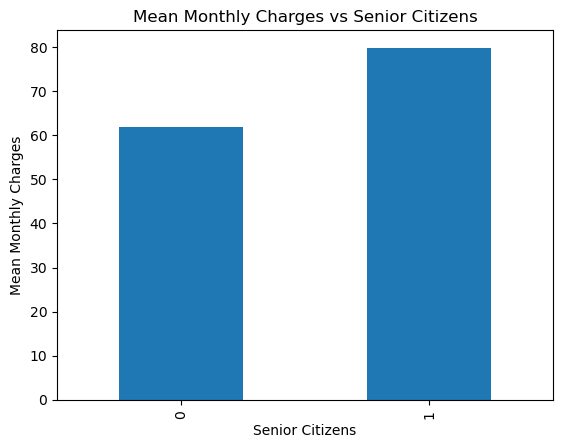

In [71]:
telco_df.groupby("SeniorCitizen")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Monthly Charges")
plt.xlabel("Senior Citizens")
plt.title("Mean Monthly Charges vs Senior Citizens")
plt.show()

### How the different Services affect the Monthly Charges.

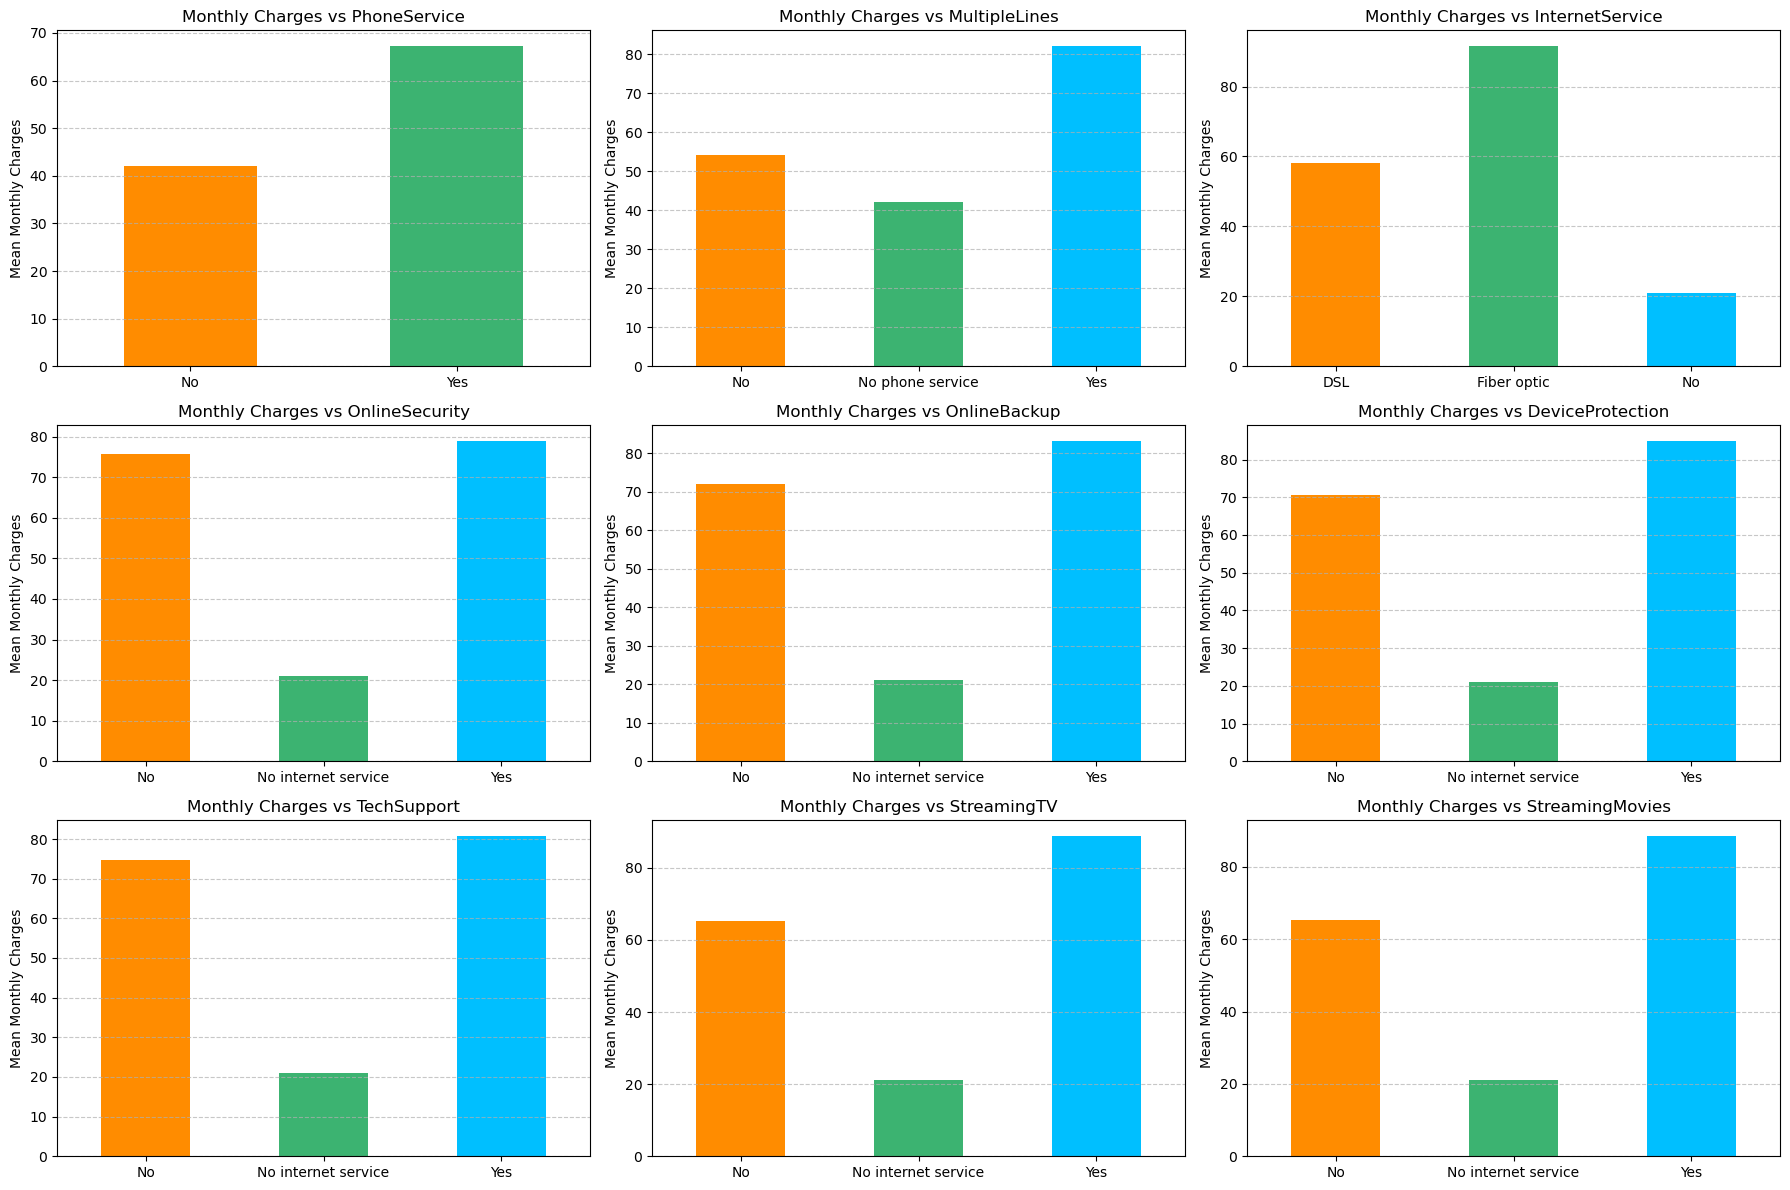

In [72]:
# Sectioning the service columns
service_cols = telco_df.columns[6:15]

# Create subplots: 3 rows x 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each service column and plot a bar plot 
for i, col in enumerate(service_cols):
    telco_df.groupby(col)["MonthlyCharges"].mean().plot(
        kind="bar",
        ax=axes[i],
        color=["darkorange", "mediumseagreen", "deepskyblue"]
    )
    axes[i].set_title(f"Monthly Charges vs {col}")
    axes[i].set_ylabel("Mean Monthly Charges")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


We can see that the mean monthly charges are affected by the Different Services provided. This makes sense as inn most descriptions one is charged for the services they use.

---

## How the Categorical variables relate to Churn.

In [73]:
# Convert 'Churn' to binary for correlation (Yes = 1, No = 0)
telco_df["Churn"] = telco_df["Churn"].map({"Yes": 1, "No": 0})

In [74]:
# Defining the categorical columns
categorical_cols = telco_df.select_dtypes(include='object').columns

### Visualization of the caegorical variables against Churn.

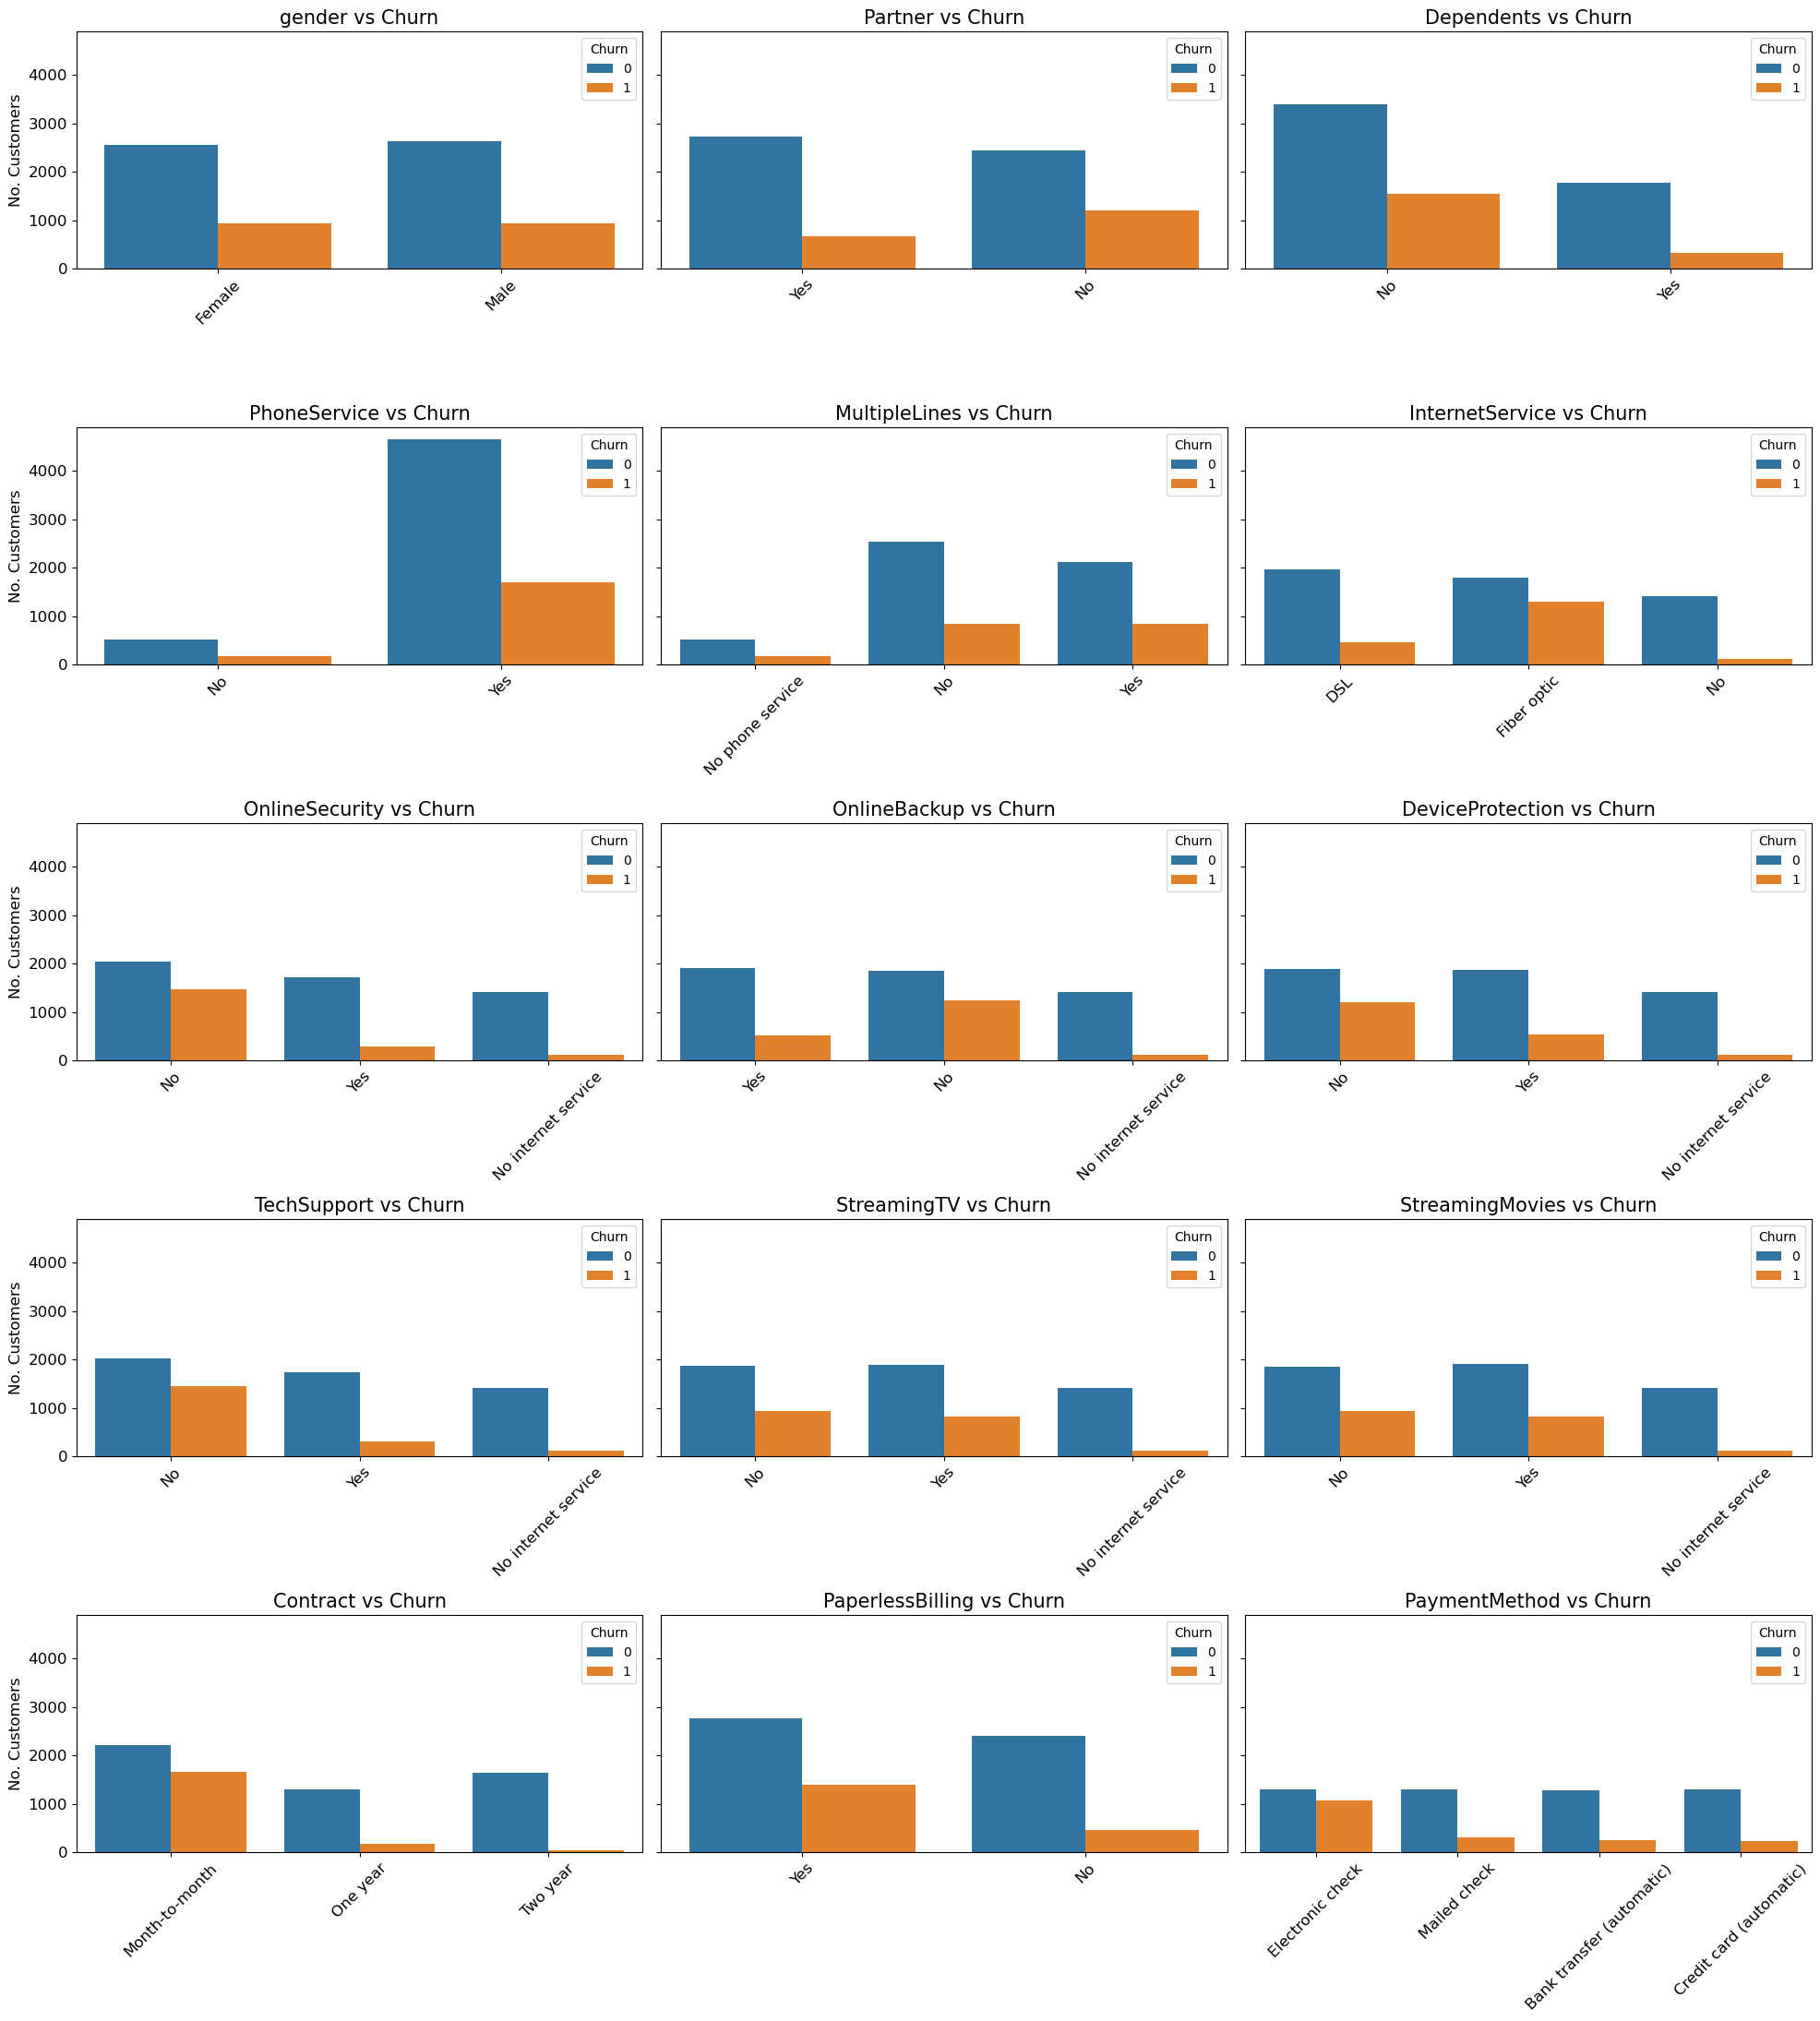

In [75]:
# Create subplots: 5 rows x 3 columns
fig, axes = plt.subplots(5, 3, figsize=(20, 22), sharey=True) # using a similar axes for easier comparion
axes = axes.flatten()  # Flatten to easily iterate

# dropping the customerID column. 
categorical_cols = [col for col in categorical_cols if col != 'customerID']

# viewing the Categorical columns against churn
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn', data=telco_df, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn", fontsize=15)
    axes[i].set_ylabel("No. Customers", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', labelsize=12, rotation=45,)
    axes[i].tick_params(axis='y', labelsize=12)
    

plt.tight_layout()
plt.show()

From the above we learn alot:
1. Gender of the customer doesn't greatly affect the Churn rate.
2. When one has a partner or dependent their churn rate is low, could be because they are using the services together.
3. Churn is higher among customers who are not subscribed to specific services offered by the company.
4. Most customers use the phone service, which is associated with a significantly lower churn rate.
5. Customers on month-to-month contracts are more likely to churn compared to those with one- or two-year contracts. We also observe that the majority of customers have month-to-month subscriptions.
6. Most of our customers use paperless Billing (receiving an electronic version of a bill instead of a paper bill) 
7. Churn is highest among those who pay via electronic check, compared to other payment methods.

---

## Correlation of the different Factors that affect the Churn Rate
To do this we must encode the categorical columns as well as drop the customerID column.

In [76]:
# droping the CustomerID column before encoding 
telco_df.drop("customerID", axis=1, inplace=True)

In [77]:
# Converting the categorical columns to numeric using one-hot encoding
telco_encoded = pd.get_dummies(telco_df, drop_first=True)

In [78]:
# Calculating the correlation with Churn
correlation_with_churn = telco_encoded.corr()["Churn"].sort_values(ascending=False)
print(correlation_with_churn)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


## Bar Plot of the Top 10 Features Most Correlated with Churn

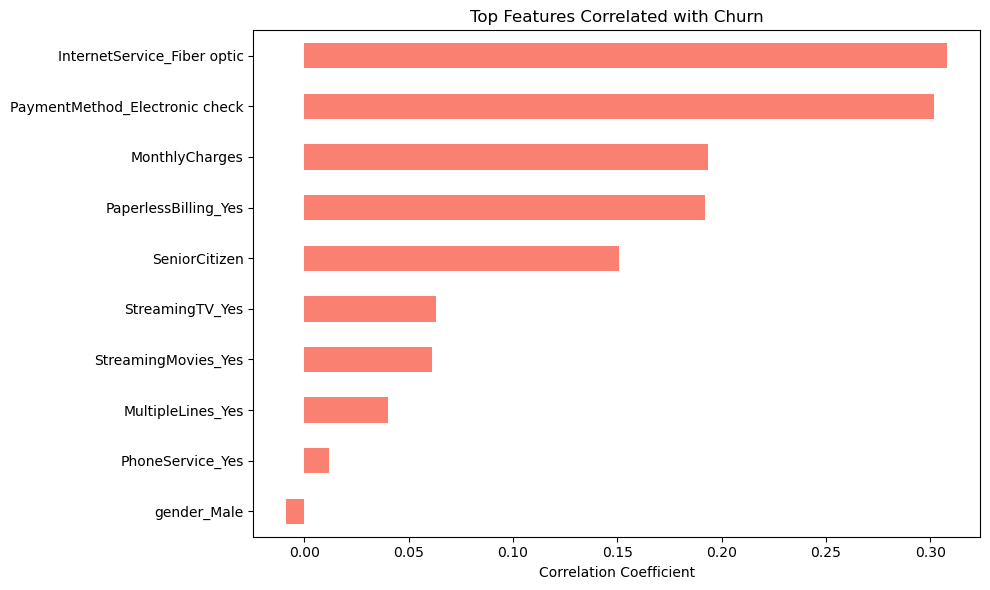

In [79]:
# Selecting the top 10 correlated features with Churn
top_features = correlation_with_churn[1:11]  # Skip 'Churn' itself

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='salmon')
plt.title("Top Features Correlated with Churn")
plt.xlabel("Correlation Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Correlation Heatmap of the Top 10 Features Related to Churn

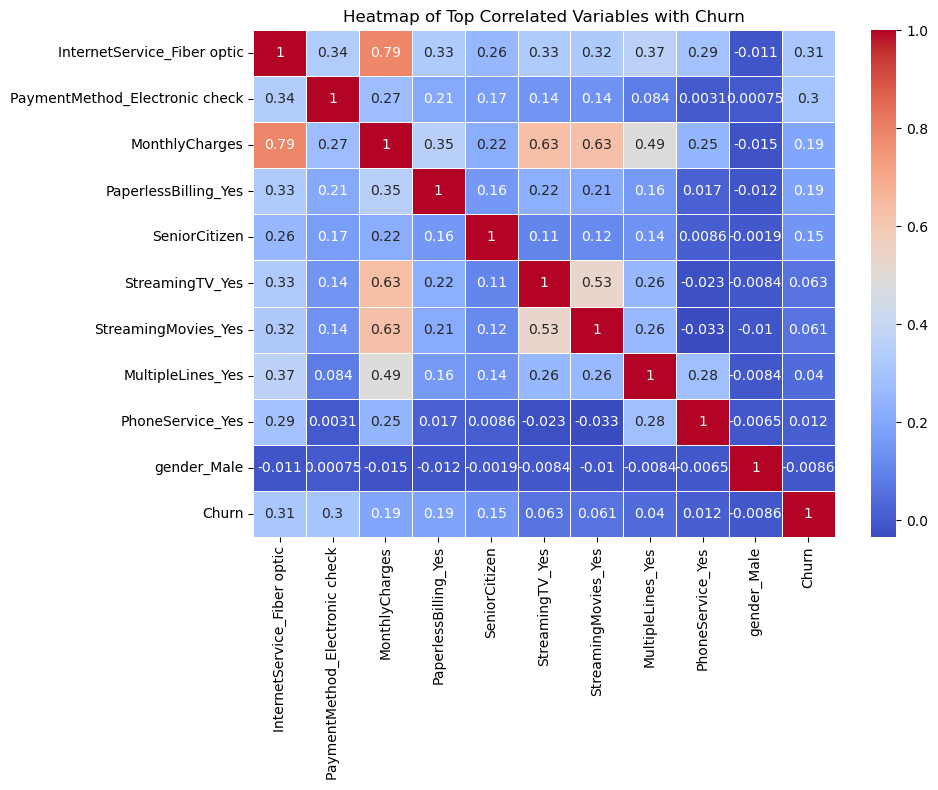

In [80]:
#selecting only the top features contributing to churn.
top_corr_vars = telco_encoded[top_features.index.tolist() + ["Churn"]]

#plotting of the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_vars.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top Correlated Variables with Churn")
plt.tight_layout()
plt.show()

From the heatmap, it is evident that monthly charges are strongly correlated with several services that also contribute to higher churn rates. The strongest correlations include:

1. Internet Service: Fiber Optic – 0.79

2. Streaming TV and Streaming Movies – 0.63

3. Multiple Lines – 0.49

This suggests that customers who subscribe to more services, especially fiber internet and streaming add-ons, tend to have higher monthly bills, which could be contributing to dissatisfaction and eventual churn.

Additionally, the strong correlation (0.49) between Streaming TV and Streaming Movies indicates that customers often subscribe to both services together, likely increasing their overall cost.

These insights highlight the importance of managing service bundles and pricing. The company should consider offering value-based packages or discounts for customers with multiple services to reduce their likelihood of leaving

## Summary of Key Contributors to Churn and Actionable Solutions from observation of the heatmap and bar plot

| **Factor**                       | **Insight**                                                                                            | **Recommended Action**                                                                  |
| -------------------------------- | ------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------- |
| Internet Service: Fiber Optic    | Strongly correlated with churn and has a high association with higher monthly charges.                 | Improve reliability and customer support for fiber users; offer bundled discounts.      |
| Payment Method: Electronic Check | Highly correlated with churn, possibly due to failed payments or lack of trust.                        | Encourage switch to auto-pay or credit card; improve payment transparency.              |
| Monthly Charges                  | Higher charges are linked to higher churn; strongly tied to multiple service subscriptions.            | Create value bundles, flexible plans, or loyalty discounts for heavy users.             |
| Paperless Billing: Yes           | Slightly higher churn among paperless billing users.                                                   | Ensure billing clarity, provide monthly summaries, and proactively handle complaints.   |
| Senior Citizens                  | Elderly customers show moderately higher churn.                                                        | Provide simpler packages, dedicated support, and possible senior discounts.             |
| Streaming Services (TV & Movies) | Streaming TV and Movies are correlated with each other and with higher charges, which may drive churn. | Bundle them affordably, communicate value clearly, and include them in retention plans. |


---

# Churn Prediction Model

In [81]:
# the data frame  we will use 
telco_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Selecting the top 25 features for our feature Matrix.

In [82]:
# Using the top 15 correlated factors for building the model
top_features_15 = correlation_with_churn[1:16].index.tolist()
print(top_features_15)

['InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'PaperlessBilling_Yes', 'SeniorCitizen', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'PhoneService_Yes', 'gender_Male', 'MultipleLines_No phone service', 'DeviceProtection_Yes', 'OnlineBackup_Yes', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']


In [83]:
X = telco_encoded[top_features_15] # feature matrix (what the model learns from)
y = telco_encoded["Churn"] # target matrix (what the model tries to predict)


### Splitting the data into Train and Test Data.

In [84]:
# 20% is our test data and 80% will be our training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Data using Logistic Regression.

In [85]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluaing the model

In [86]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7757274662881476
[[942  94]
 [222 151]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.62      0.40      0.49       373

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409



We can see that the model Accuracy is 77.6% using Logistic Regression.
The Confrusion Matrix output is:
|                         | Predicted No Churn (0) | Predicted Churn (1)  |
| ----------------------- | ---------------------- | -------------------- |
| **Actual No Churn (0)** | 942 (True Negatives)   | 94 (False Positives) |
| **Actual Churn (1)**    | 222 (False Negatives)  | 151 (True Positives) |

### Summary of Logistic Regression model.

The model performs better at predicting customers who did not churn (label 0), but struggles with those who did churn (label 1). This is likely due to class imbalance in the dataset, where non-churners significantly outnumber churners. Since our main interest lies in accurately identifying customers who are likely to churn, we will focus on improving the model’s performance in this area.

---

### Balancing the Data set using SMOTE(Synthetic Minority Over-sampling Technique)

How it works:
SMOTE creates new samples by interpolating between existing minority class samples.

Using this method to balance our dataset because:
1. Generates synthetic (not duplicate) samples for the minority class (churners).
2. Helps the model learn better decision boundaries.
3. Avoids overfitting like random oversampling and retains more data than undersampling.

In [87]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Splitting the balanced Data

In [88]:
# Spliting the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Training the Resampled data using XGBoost Model.

This is mainly because it handles class imbalance better and it captures nonlinear relationships between features

In [89]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Predicting the model and tuning the classification threshold

In [90]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.3).astype(int) # using a lower threshold inorder to incooporate more churners

### Evaluating the model.

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.782608695652174
[[664 357]
 [ 93 956]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1021
           1       0.73      0.91      0.81      1049

    accuracy                           0.78      2070
   macro avg       0.80      0.78      0.78      2070
weighted avg       0.80      0.78      0.78      2070



### Summary of the XGBOOST classifier and a balanced dataset

We can see that the model Accuracy is 78.3% using Logistic Regression.
The Confrusion Matrix output is:
|                         | Predicted No Churn (0) | Predicted Churn (1)  |
| ----------------------- | ---------------------- | -------------------- |
| **Actual No Churn (0)** | 664 (True Negatives)   | 357 (False Positives) |
| **Actual Churn (1)**    | 93 (False Negatives)   | 956(True Positives) |

After reducing the classification threshold to 0.3, the model now correctly identifies more churners — increasing true positives to 956 and reducing false negatives to 93. While this leads to more false positives (357), it is an acceptable trade-off since our goal is to accurately identify customers at risk of churning.

This improvement was achieved using a balanced dataset (to address class imbalance) and the XGBoost classifier, which is well-suited for handling complex relationships and imbalanced data. The resulting model strikes a better balance between accuracy and recall, making it more effective for churn prediction.

---